You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
    
1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

##### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

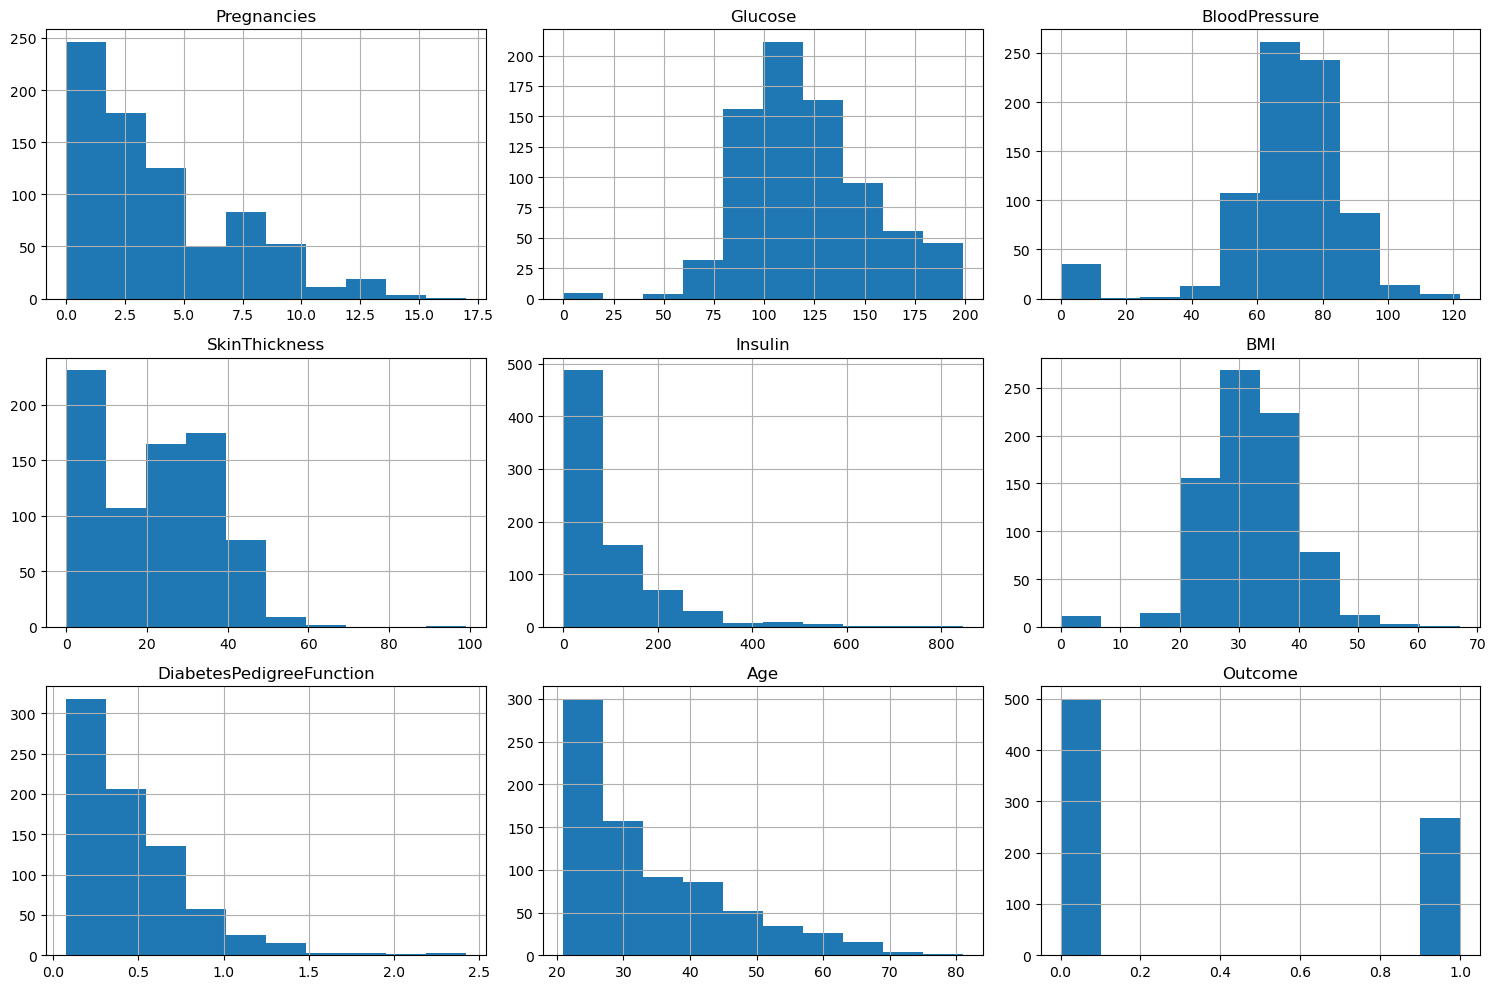

In [8]:
data.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

In [9]:
corr_matrix=data.corr()

In [10]:
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


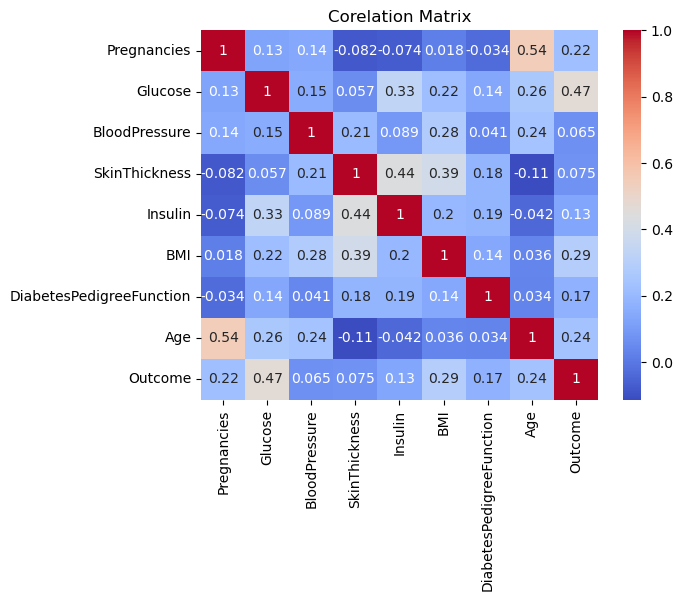

In [11]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Corelation Matrix')
plt.show()

##### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
x=data.drop("Outcome",axis=1)
y=data['Outcome']

In [18]:
scaler=StandardScaler()

In [19]:
data=scaler.fit_transform(data)

In [20]:
data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [26]:
tree=DecisionTreeClassifier()

In [27]:
parameter={'criterion':["gini","entropy","log_loss"],
          'splitter':["best","random"],
          'max_depth':[2,5,10]
          }

grid_search=GridSearchCV(tree,param_grid=parameter,cv=5,verbose=3)

In [28]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=gini, max_depth=2, splitter=best;, score=0.699 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, splitter=best;, score=0.813 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, splitter=best;, score=0.724 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, splitter=best;, score=0.779 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, splitter=random;, score=0.675 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, splitter=random;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, splitter=random;, score=0.650 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, splitter=random;, score=0.724 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [29]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [30]:
decision_tree=DecisionTreeClassifier(criterion='gini',max_depth=2,splitter='best')

In [31]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
y_pred=decision_tree.predict(x_test)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [34]:
accuracy_score(y_test,y_pred)

0.7727272727272727

##### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve,roc_auc_score

In [36]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1-Score:",f1_score(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Accuracy Score: 0.7727272727272727
Precision Score: 0.7272727272727273
Recall: 0.5818181818181818
F1-Score: 0.6464646464646464
Confusion Matrix: [[87 12]
 [23 32]]


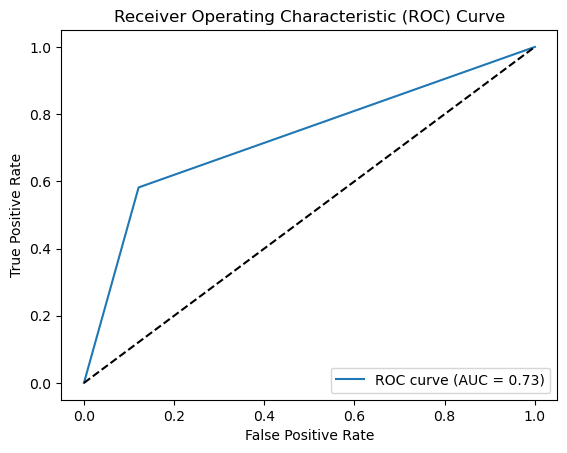

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

[Text(0.5, 0.8333333333333334, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.5, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.75, 0.5, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.4\nsamples = 163\nvalue = [45, 118]')]

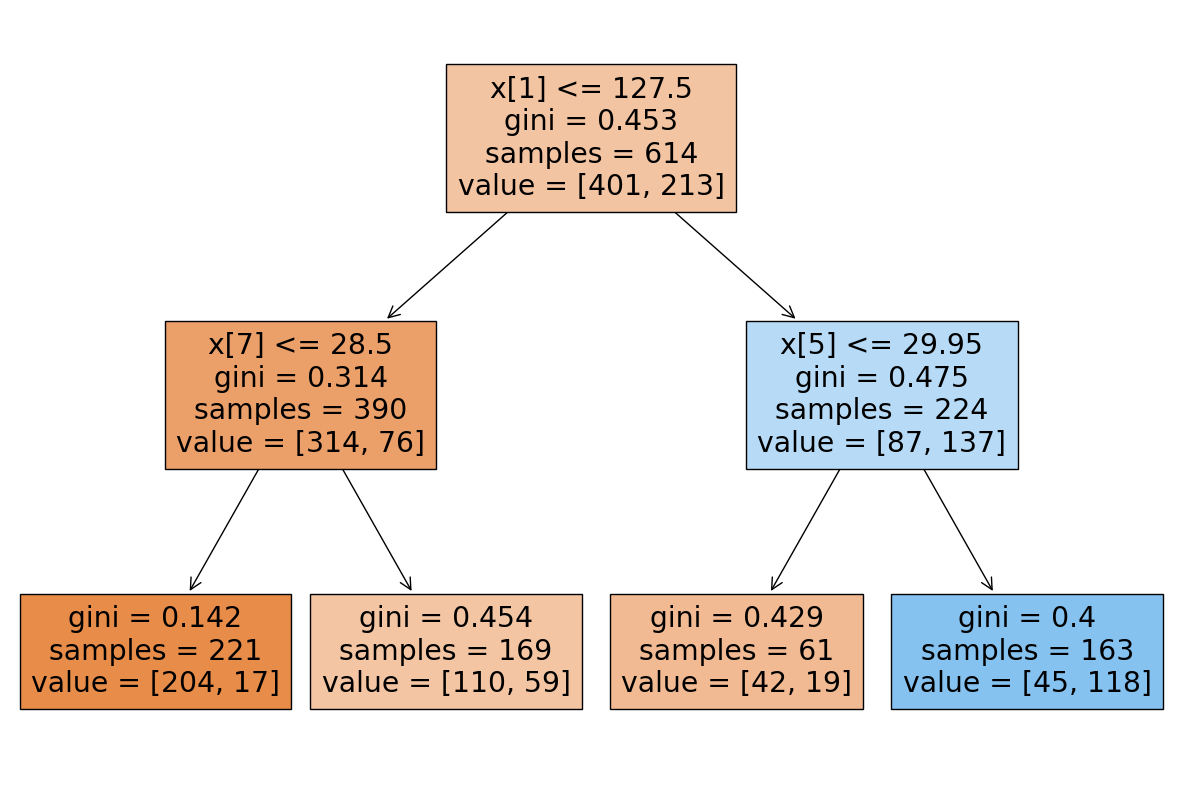

In [38]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)

Interpreting a decision tree involves examining its splits, branches, and leaves to understand the patterns and trends captured by the model. By analyzing the decision tree, you can identify the most important variables and their thresholds, and use domain knowledge and common sense to explain the underlying patterns. Here are the steps to interpret a decision tree:

1. Examine the root node: The root node of the decision tree represents the entire dataset. Look at the variable and threshold used to split the data at this node. This split provides the first division of the dataset based on the most significant variable.

2. Follow the branches: Follow the branches from the root node to the subsequent nodes. Each node represents a subset of the data based on the splits made at previous nodes. Pay attention to the variables and thresholds used for each split, as they indicate the conditions that separate the data into different groups.

3. Interpret the leaves: The leaves of the decision tree represent the final predictions or classifications. Each leaf corresponds to a specific outcome or class label. Look at the majority class or predicted value in each leaf and consider the decision path that led to it.

4. Identify important variables and thresholds: Notice which variables appear at higher levels of the tree and are involved in multiple splits. These variables can be considered more important in the decision-making process. Additionally, observe the thresholds used for splits to understand the specific values or ranges that contribute to the decision process.

5. Explain patterns and trends: Use domain knowledge and common sense to interpret the patterns and trends captured by the decision tree. Consider the relationships between variables, the impact of certain thresholds, and how they align with your understanding of the problem domain. Look for logical explanations for the splits and the resulting predictions.

By carefully examining the splits, branches, and leaves of the decision tree, you can gain insights into the most important variables and their thresholds. These insights, combined with your domain knowledge and common sense, can help explain the underlying patterns and trends captured by the model.

##### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the,dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [39]:
import pickle

In [43]:
filename='decision_tree.pkl'

In [44]:
with open(filename,'wb') as file:
    pickle.dump(decision_tree,file)

In [46]:
pd.DataFrame(x_test).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [47]:
pd.DataFrame(y_test).head()

,Outcome
668,0
324,0
624,0
690,0
473,0


In [48]:
with open(filename,'rb') as file:
    model=pickle.load(file)

In [61]:
test_data={'Pregnancies':[0,3],'Glucose':[100,150],'BloodPressure':[80,90],'SkinThickness':[28,32],'Insulin':[150,130],
          'BMI':[24.1,29.9],'DiabetesPedigreeFunction':[0.566,0.789],'Age':[25,32],'Outcome':[0,1]}

In [62]:
test_data=pd.DataFrame(test_data)

In [63]:
test_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,100,80,28,150,24.1,0.566,25,0
1,3,150,90,32,130,29.9,0.789,32,1


In [64]:
x_test1=test_data.drop('Outcome',axis=1)

In [65]:
y_test1=test_data['Outcome']

In [67]:
y_pred1=model.predict(x_test1)

In [68]:
accuracy_score(y_test1,y_pred1)

0.5